In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt


# @title Figure Settings
import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/nma.mplstyle")

# @title Plotting Functions
# drift-diffusion model
# returns t, x

def plot_random_walk_sims(sims, nsims=10):
  """Helper for exercise 3A"""
  fig = plt.figure()
  plt.plot(sim[:nsims, :].T)
  plt.xlabel('time')
  plt.ylabel('position x')
  plt.show()

def plot_mean_var_by_timestep(mu, var):
  """Helper function for exercise 3A.2"""
  fig, (ah1, ah2) = plt.subplots(2)

  # plot mean of distribution as a function of time
  ah1.plot(mu)
  ah1.set(ylabel='mean')
  ah1.set_ylim([-5, 5])

  # plot variance of distribution as a function of time
  ah2.plot(var)
  ah2.set(xlabel='time')
  ah2.set(ylabel='variance')

  plt.show()

def plot_ddm(t, x, xinfty, lam, x0):
  fig = plt.figure()

  plt.plot(t, xinfty * (1 - lam**t) + x0 * lam**t, 'r')
  plt.plot(t, x, 'k.')          # simulated data pts

  plt.xlabel('t')
  plt.ylabel('x')

  plt.legend({'deterministic solution', 'simulation'})
  plt.show()

def var_comparison_plot(empirical, analytical):
  fig = plt.figure()
  plt.plot(empirical, analytical, '.', markersize=15)
  plt.xlabel('empirical equilibrium variance')
  plt.ylabel('analytic equilibrium variance')
  plt.plot(np.arange(8), np.arange(8), 'k', label='45 deg line')
  plt.legend()

  plt.grid(True)
  plt.show()

def plot_dynamics(x, t, lam, xinfty=0):
  """ Plot the dynamics """
  fig = plt.figure()
  plt.title('$\lambda=%0.1f$' % lam, fontsize=16)
  x0 = x[0]
  plt.plot(t, xinfty + (x0 - xinfty) * lam**t, 'r', label='analytic solution')
  plt.plot(t, x, 'k.', label='simulation')          # simulated data pts
  plt.ylim(0, x0+1)

  plt.xlabel('t')
  plt.ylabel('x')
  plt.legend()
  plt.show()

  

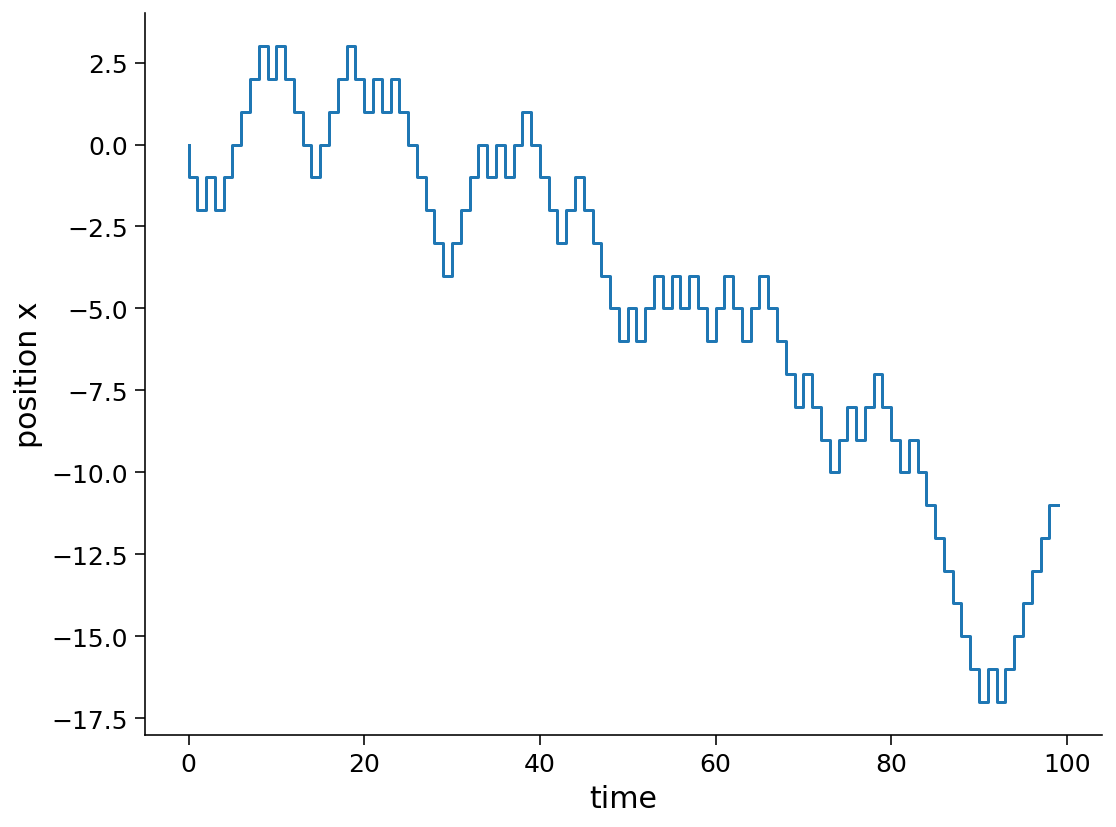

In [2]:
# @markdown Execute to simulate a random walk
# parameters of simulation
T = 100
t = np.arange(T)
x = np.zeros_like(t)
np.random.seed(2020) # set random seed

# initial position
x[0] = 0

# step forward in time
for k in range(len(t)-1):
    # choose randomly between -1 and 1 (coin flip)
    this_step = np.random.choice([-1,1])

    # make the step
    x[k+1] = x[k] + this_step

# plot this trajectory
fig = plt.figure()
plt.step(t, x)
plt.xlabel('time')
plt.ylabel('position x');

In [7]:
N = 100000
x = np.zeros(N)
t = np.linspace(0,1,N)
x[0] = np.random.randint(1,N)
for i in range(1,N):
    if x[i-1]%2 ==0:
        x[i] = x[i-1]
    else:
        x[i] = x[i-1]

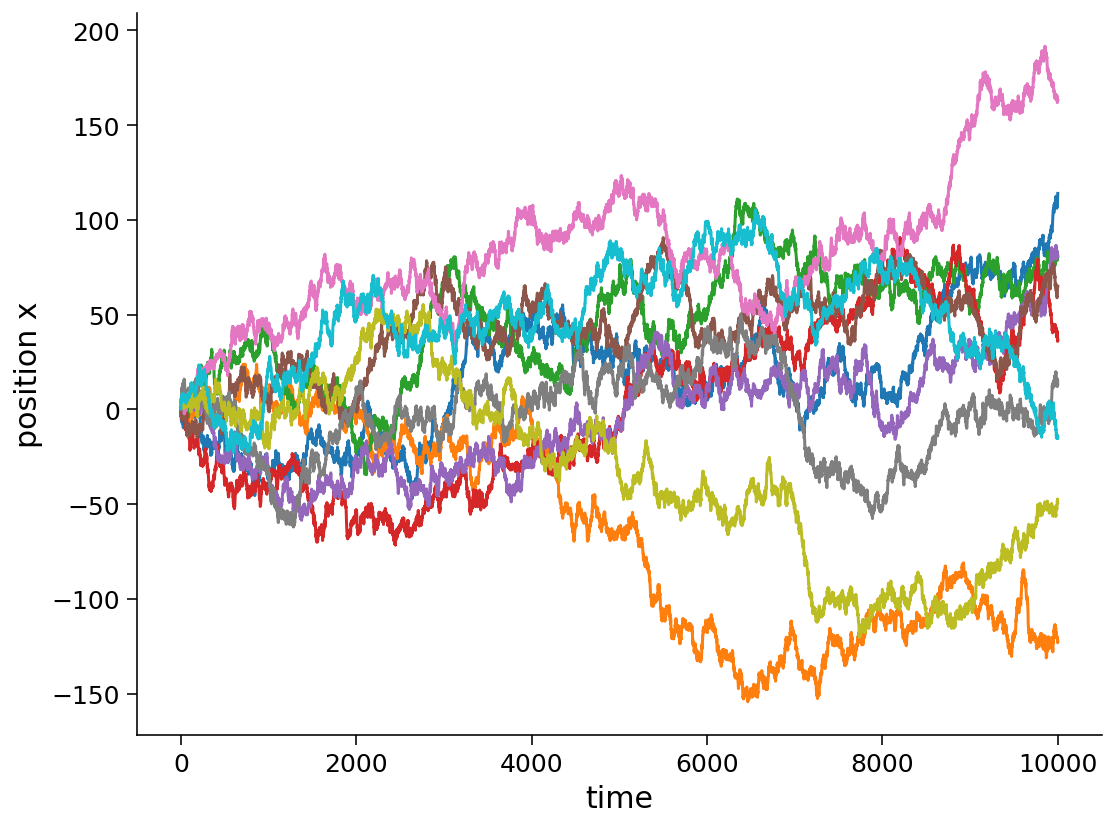

In [9]:
def random_walk_simulator(N, T, mu=0, sigma=1):
  '''Simulate N random walks for T time points. At each time point, the step
      is drawn from a Gaussian distribution with mean mu and standard deviation
      sigma.

  Args:
    T (integer) : Duration of simulation in time steps
    N (integer) : Number of random walks
    mu (float) : mean of step distribution
    sigma (float) : standard deviation of step distribution

  Returns:
    (numpy array) : NxT array in which each row corresponds to trajectory
  '''


  # generate all the random steps for all steps in all simulations in one go
  # produces a N x T array
  steps = np.random.normal(mu,sigma, size=(N,T))

  # compute the cumulative sum of all the steps over the time axis
  sim = np.cumsum(steps, axis=1)

  return sim


np.random.seed(2020) # set random seed

# simulate 1000 random walks for 10000 time steps
sim = random_walk_simulator(1000, 10000,  mu=0, sigma=1)

# take a peek at the first 10 simulations
plot_random_walk_sims(sim, nsims=10)

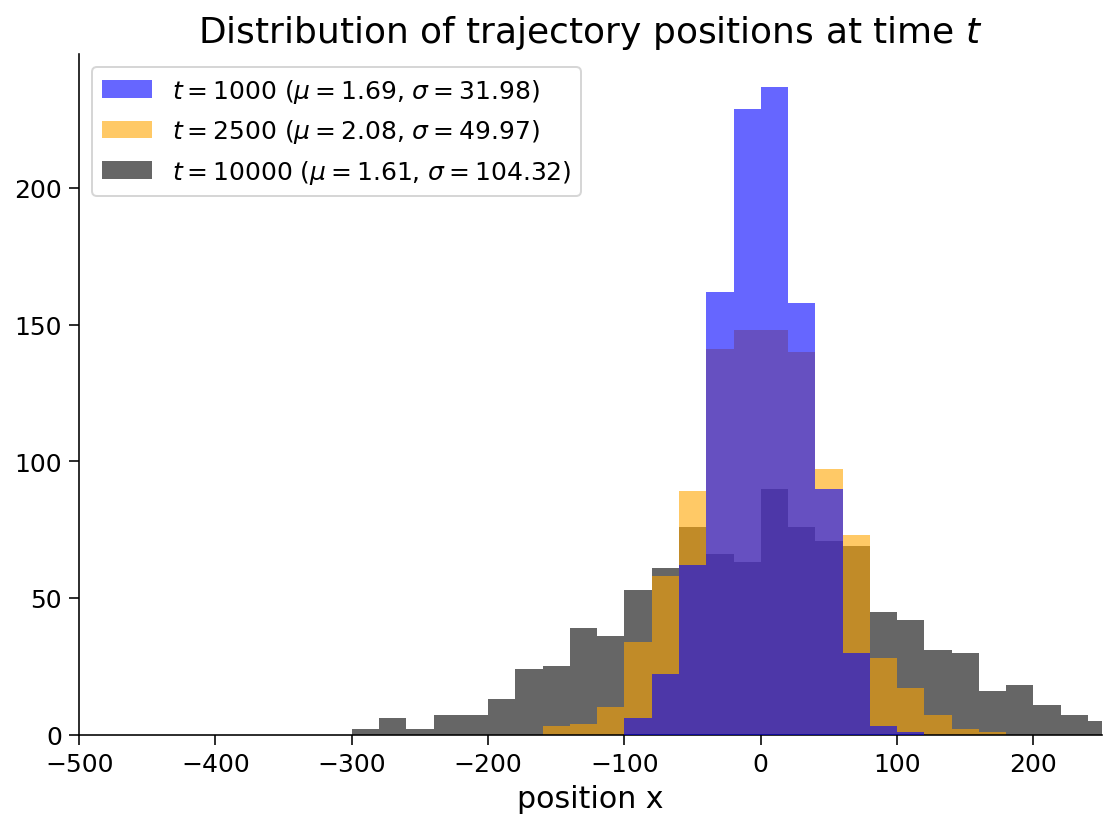

In [10]:
# @markdown Execute to visualize distribution of bacteria positions
fig = plt.figure()
# look at the distribution of positions at different times
for i, t in enumerate([1000,2500,10000]):

    # get mean and standard deviation of distribution at time t
    mu = sim[:, t-1].mean()
    sig2 = sim[:, t-1].std()

    # make a plot label
    mytitle = '$t=${time:d} ($\mu=${mu:.2f}, $\sigma=${var:.2f})'

    # plot histogram
    plt.hist(sim[:,t-1],
             color=['blue','orange','black'][i],
             #make sure the histograms have the same bins!
             bins=np.arange(-300,300,20),
             # make histograms a little see-through
             alpha=0.6,
             # draw second histogram behind the first one
             zorder=3-i,
             label=mytitle.format(time=t, mu=mu, var=sig2))

    plt.xlabel('position x')

    # plot range
    plt.xlim([-500, 250])

    # add legend
    plt.legend(loc=2)

    # add title
    plt.title(r'Distribution of trajectory positions at time $t$')

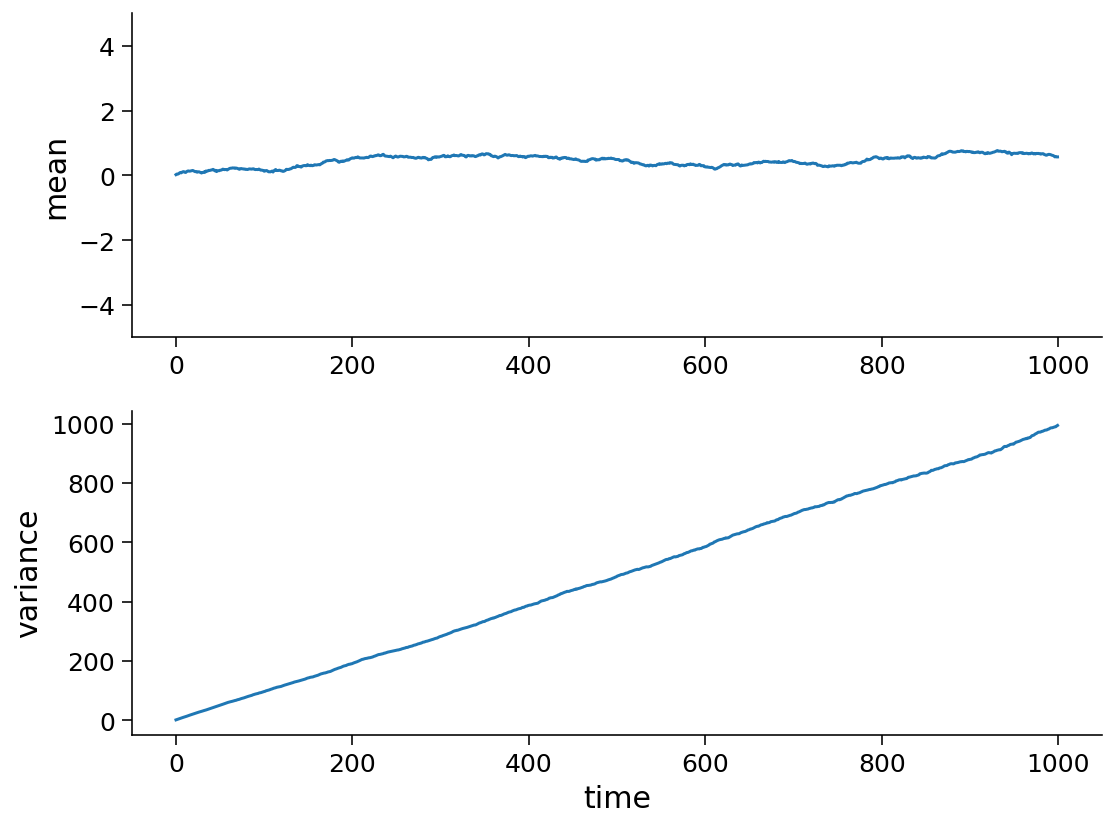

In [14]:
# Simulate random walks
np.random.seed(2020) # set random seed
sim = random_walk_simulator(5000, 1000, mu=0, sigma=1)


# Compute mean
mu = np.mean(sim,axis=0)

# Compute variance
var = np.var(sim,axis=0)

# Visualize
plot_mean_var_by_timestep(mu, var)

In [15]:
# @title

# @markdown Make sure you execute this cell to enable the widget!


@widgets.interact
def plot_gaussian(mean=(-0.5, 0.5, .02), std=(.5, 10, .5)):
  sim = random_walk_simulator(5000, 1000, mu=mean, sigma=std)

  # compute the mean and variance of trajectory positions at every time point
  mu = np.mean(sim, axis=0)
  var = np.var(sim, axis=0)

  #  make a figure
  fig, (ah1, ah2) = plt.subplots(2)

  # plot mean of distribution as a function of time
  ah1.plot(mu)
  ah1.set(ylabel='mean')

  # plot variance of distribution as a function of time
  ah2.plot(var)
  ah2.set(xlabel='time')
  ah2.set(ylabel='variance')

interactive(children=(FloatSlider(value=0.0, description='mean', max=0.5, min=-0.5, step=0.02), FloatSlider(va…

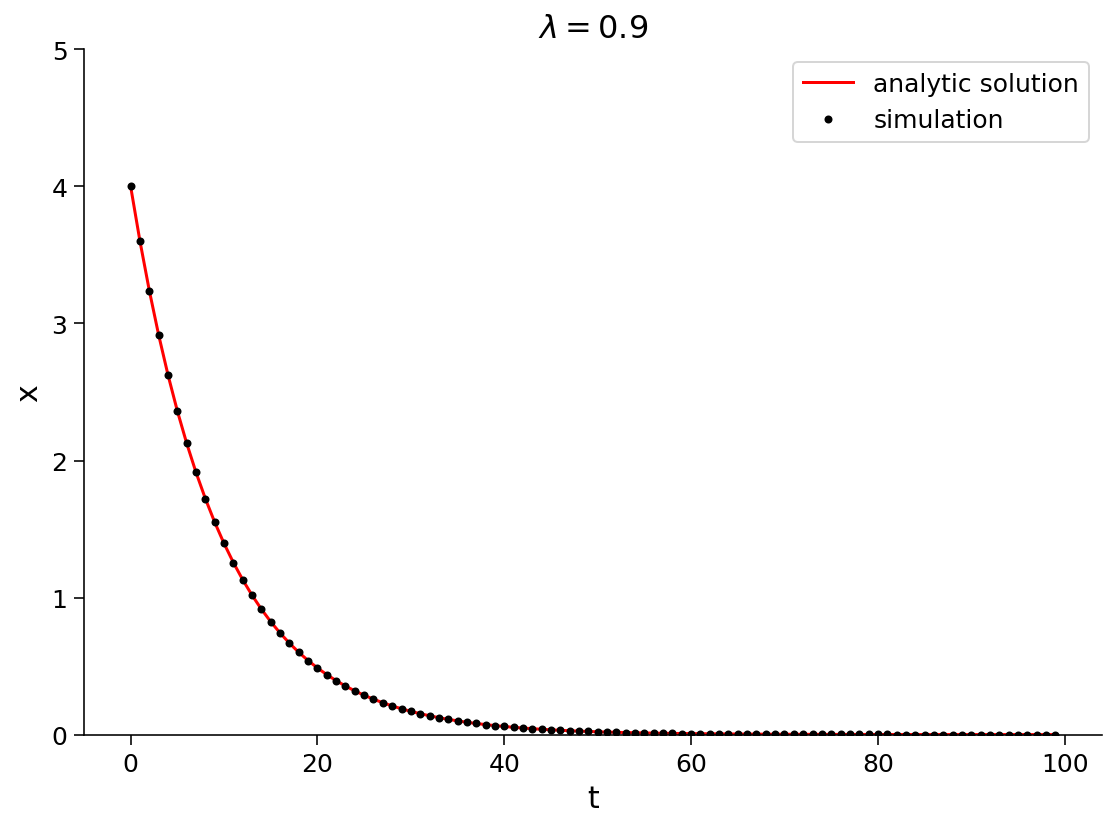

In [16]:
# parameters
lam = 0.9
T = 100      # total Time duration in steps
x0 = 4.     # initial condition of x at time 0

# initialize variables
t = np.arange(0, T, 1.)
x = np.zeros_like(t)
x[0] = x0

# Step through in time
for k in range(len(t)-1):
  x[k+1] = lam * x[k]

# plot x as it evolves in time
plot_dynamics(x, t, lam)

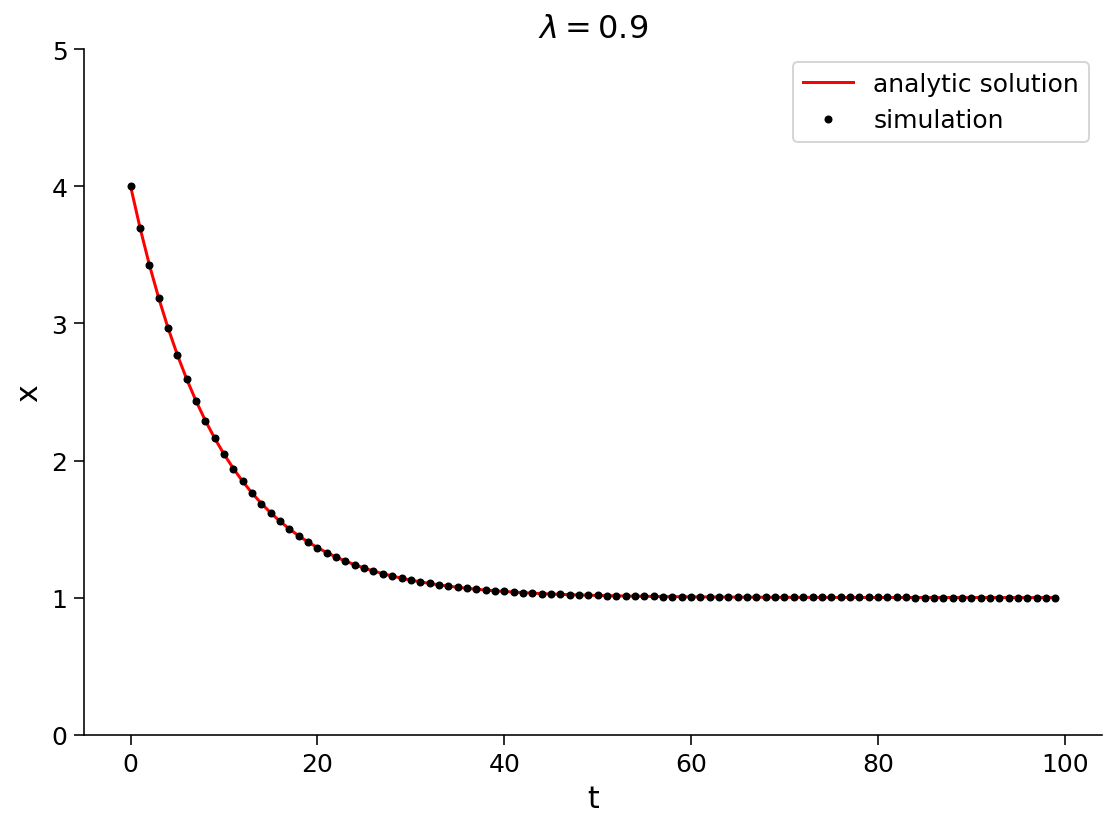

In [17]:
# parameters
lam = 0.9    # decay rate
T = 100      # total Time duration in steps
x0 = 4.      # initial condition of x at time 0
xinfty = 1.  # x drifts towards this value in long time

# initialize variables
t = np.arange(0, T, 1.)
x = np.zeros_like(t)
x[0] = x0

# Step through in time
for k in range(len(t)-1):
  x[k+1] = xinfty + lam * (x[k] - xinfty)

# plot x as it evolves in time
plot_dynamics(x, t, lam, xinfty)

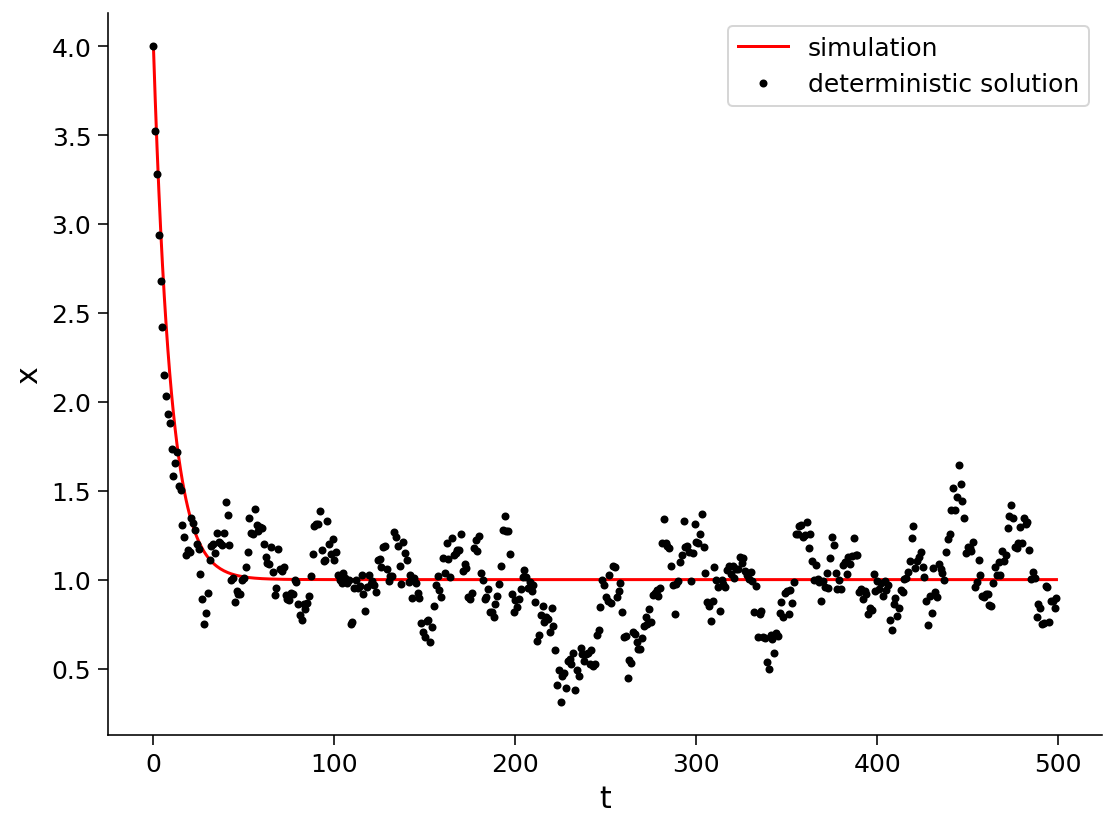

In [22]:
def simulate_ddm(lam, sig, x0, xinfty, T):
  """
  Simulate the drift-diffusion model with given parameters and initial condition.
  Args:
    lam (scalar): decay rate
    sig (scalar): standard deviation of normal distribution
    x0 (scalar): initial condition (x at time 0)
    xinfty (scalar): drift towards convergence in the limit
    T (scalar): total duration of the simulation (in steps)

  Returns:
    ndarray, ndarray: `x` for all simulation steps and the time `t` at each step
  """

  # initialize variables
  t = np.arange(0, T, 1.)
  x = np.zeros_like(t)
  x[0] = x0

  # Step through in time
  for k in range(len(t)-1):
    # update x at time k+1 with a deterministic and a stochastic component
    # hint: the deterministic component will be like above, and
    #   the stochastic component is drawn from a scaled normal distribution
    x[k+1] = xinfty + lam*(x[k] - xinfty) + sig*np.random.normal(0,1)

  return t, x


lam = 0.9    # decay rate
sig = 0.1   # standard deviation of diffusive process
T = 500      # total Time duration in steps
x0 = 4.      # initial condition of x at time 0
xinfty = 1.  # x drifts towards this value in long time

# Plot x as it evolves in time
np.random.seed(2020)
t, x = simulate_ddm(lam, sig, x0, xinfty, T)
plot_ddm(t, x, xinfty, lam, x0)

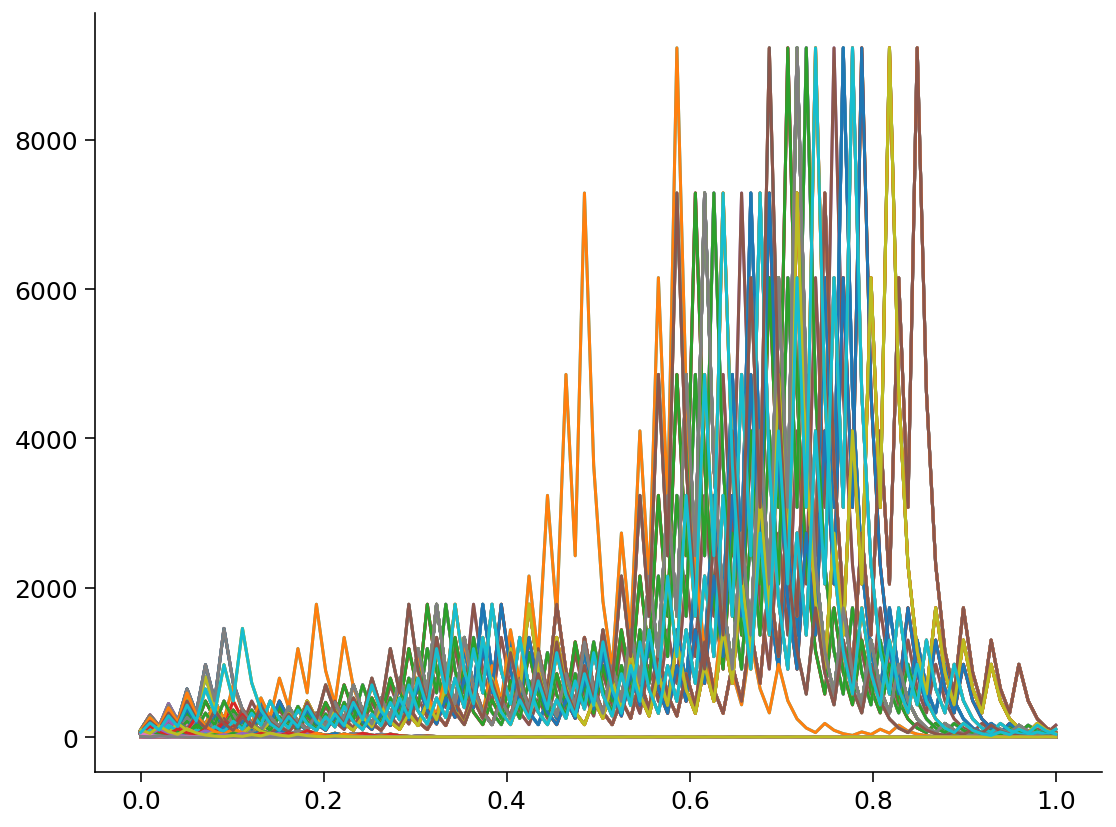

In [26]:
# collatz conjecture
N = 100
x = np.zeros(N)
t = np.linspace(0,1,N)
plt.figure()
for _ in range(400):
    x[0] = np.random.randint(0,N)
    for i in range(1,N):
        if x[i-1] % 2 == 0:
            x[i] = x[i-1]/2
        else:
            x[i] = 3*x[i-1] +1
    plt.plot(t,x)
plt.show()

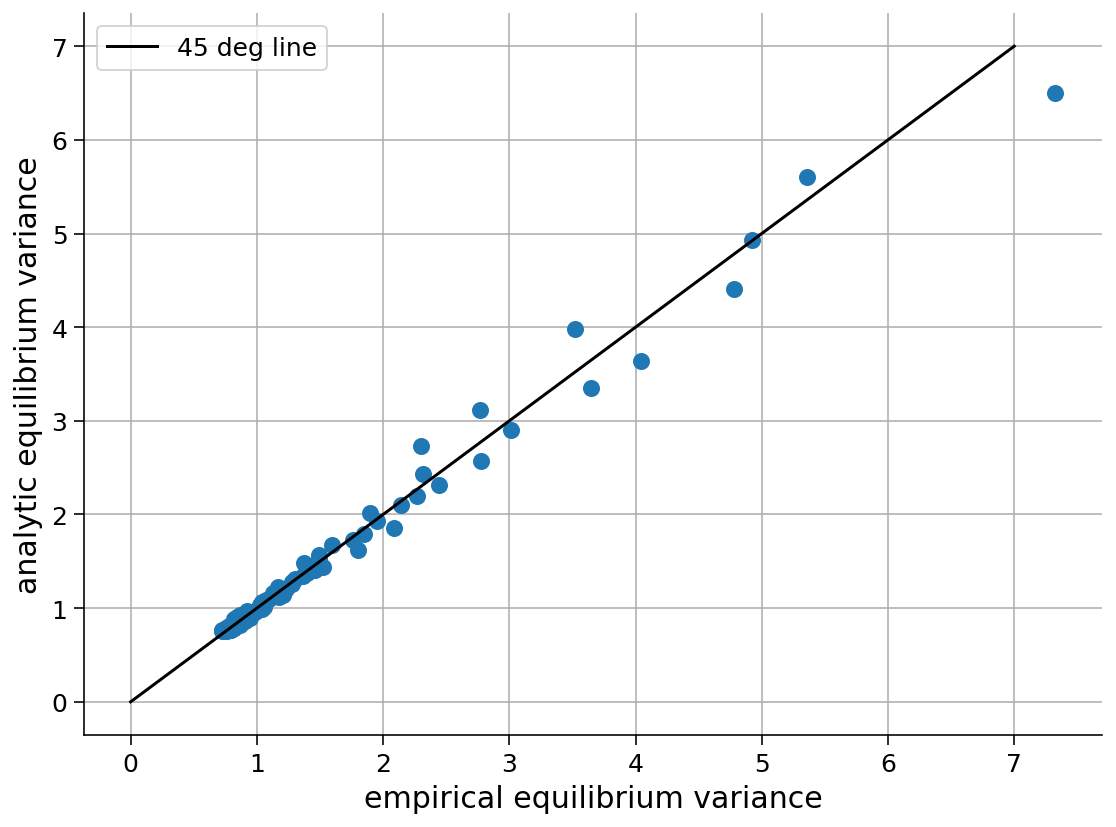

In [27]:
def ddm(T, x0, xinfty, lam, sig):
  t = np.arange(0, T, 1.)
  x = np.zeros_like(t)
  x[0] = x0

  for k in range(len(t)-1):
    x[k+1] = xinfty + lam * (x[k] - xinfty) + sig * np.random.standard_normal(size=1)

  return t, x


# computes equilibrium variance of ddm
# returns variance
def ddm_eq_var(T, x0, xinfty, lam, sig):
  t, x = ddm(T, x0, xinfty, lam, sig)

  # returns variance of the second half of the simulation
  # this is a hack: assumes system has settled by second half
  return x[-round(T/2):].var()


np.random.seed(2020) # set random seed

# sweep through values for lambda
lambdas = np.arange(0.05, 0.95, 0.01)
empirical_variances = np.zeros_like(lambdas)
analytical_variances = np.zeros_like(lambdas)

sig = 0.87

# compute empirical equilibrium variance
for i, lam in enumerate(lambdas):
  empirical_variances[i] = ddm_eq_var(5000, x0, xinfty, lambdas[i], sig)


# Hint: you can also do this in one line outside the loop!
analytical_variances = sig*sig/(1-np.square(lambdas))

# Plot the empirical variance vs analytical variance
var_comparison_plot(empirical_variances, analytical_variances)